In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# read the data

In [2]:
data=pd.read_csv('Company_Data (1).csv')

In [3]:
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


change the object to numeric

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le=LabelEncoder()

In [7]:
data['ShelveLoc']=le.fit_transform(data['ShelveLoc'])
data['US']=le.fit_transform(data['US'])
data['Urban']=le.fit_transform(data['Urban'])

In [8]:
data.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0

In [9]:
data.shape

(400, 11)

In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  \
0    False      False   False        False       False  False      False   
1    False      False   False        False       False  False      False   
2    False      False   False        False       False  False      False   
3    False      False   False        False       False  False      False   
4    False      False   False        False       False  False      False   
..     ...        ...     ...          ...         ...    ...        ...   
395  False      False   False        False       False  False      False   
396  False      False   False        False       False  False      False   
397  False      False   False        False       False  False      False   
398  False      False   False        False       False  False      False   
399  False      False   False        False       False  False      False   

       Age  Education  Urban     US  
0    False      False  False  False  
1    False      False  False  False  
2    False      False  False  False  
3    False      False  False  False  
4    False      False  False  False  
..     ...        ...    ...    ...  
395  False      False  False  False  
396  False      False  False  False  
397  False      False  False  False  
398  False      False  False  False  
399  False      False  False  False  

[400 rows x 11 columns]

In [12]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### heatmap

<Axes: >

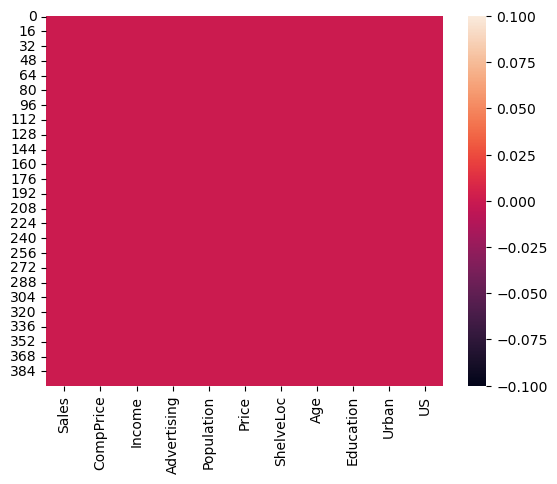

In [13]:
sns.heatmap(data.isnull())

In [14]:
data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price   ShelveLoc         Age   Education       Urban          US  
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000  
mean   115.795000    1.307500   53.322500   13.900000    0.705000    0.645000  
std     23.676664    0.833475   16.200297    2.620528    0.456614    0.479113  
min     24.000000    0.000000   25.000000   10.000000    0.000000    0.000000  
25%    100.000000    1.000000   39.750000   12.000000    0.000000    0.000000  
50%    117.000000    2.000000   54.500000   14.000000    1.000000    1.000000  
75%    131.000000    2.000000   66.000000   16.000000    1.000000    1.000000  
max    191.000000    2.000000   80.000000   18.000000    1.000000    1.000000

In [15]:
data.corr().sum()

Sales          1.126430
CompPrice      1.481139
Income         1.064082
Advertising    2.311378
Population     1.016121
Price          1.144672
ShelveLoc      1.045789
Age            0.613985
Education      0.684796
Urban          1.104660
US             2.024175
dtype: float64

### heatmap for corr

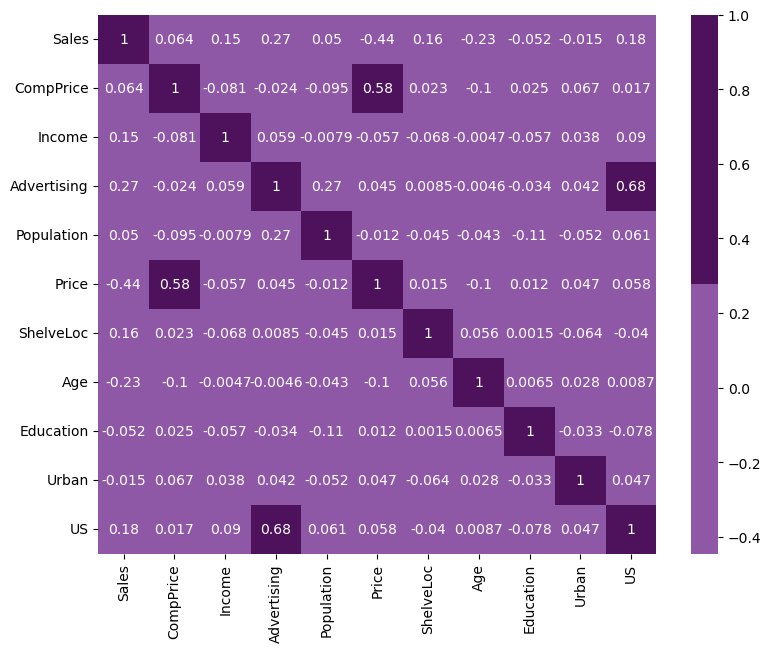

In [16]:
plt.figure(figsize=(9,7))
colours = ['#8F58A7','#4D125B'] 
pal = sns.color_palette(colours)
sns.heatmap(data.corr(), cmap=pal,annot=True)
plt.show()

# visualise the data

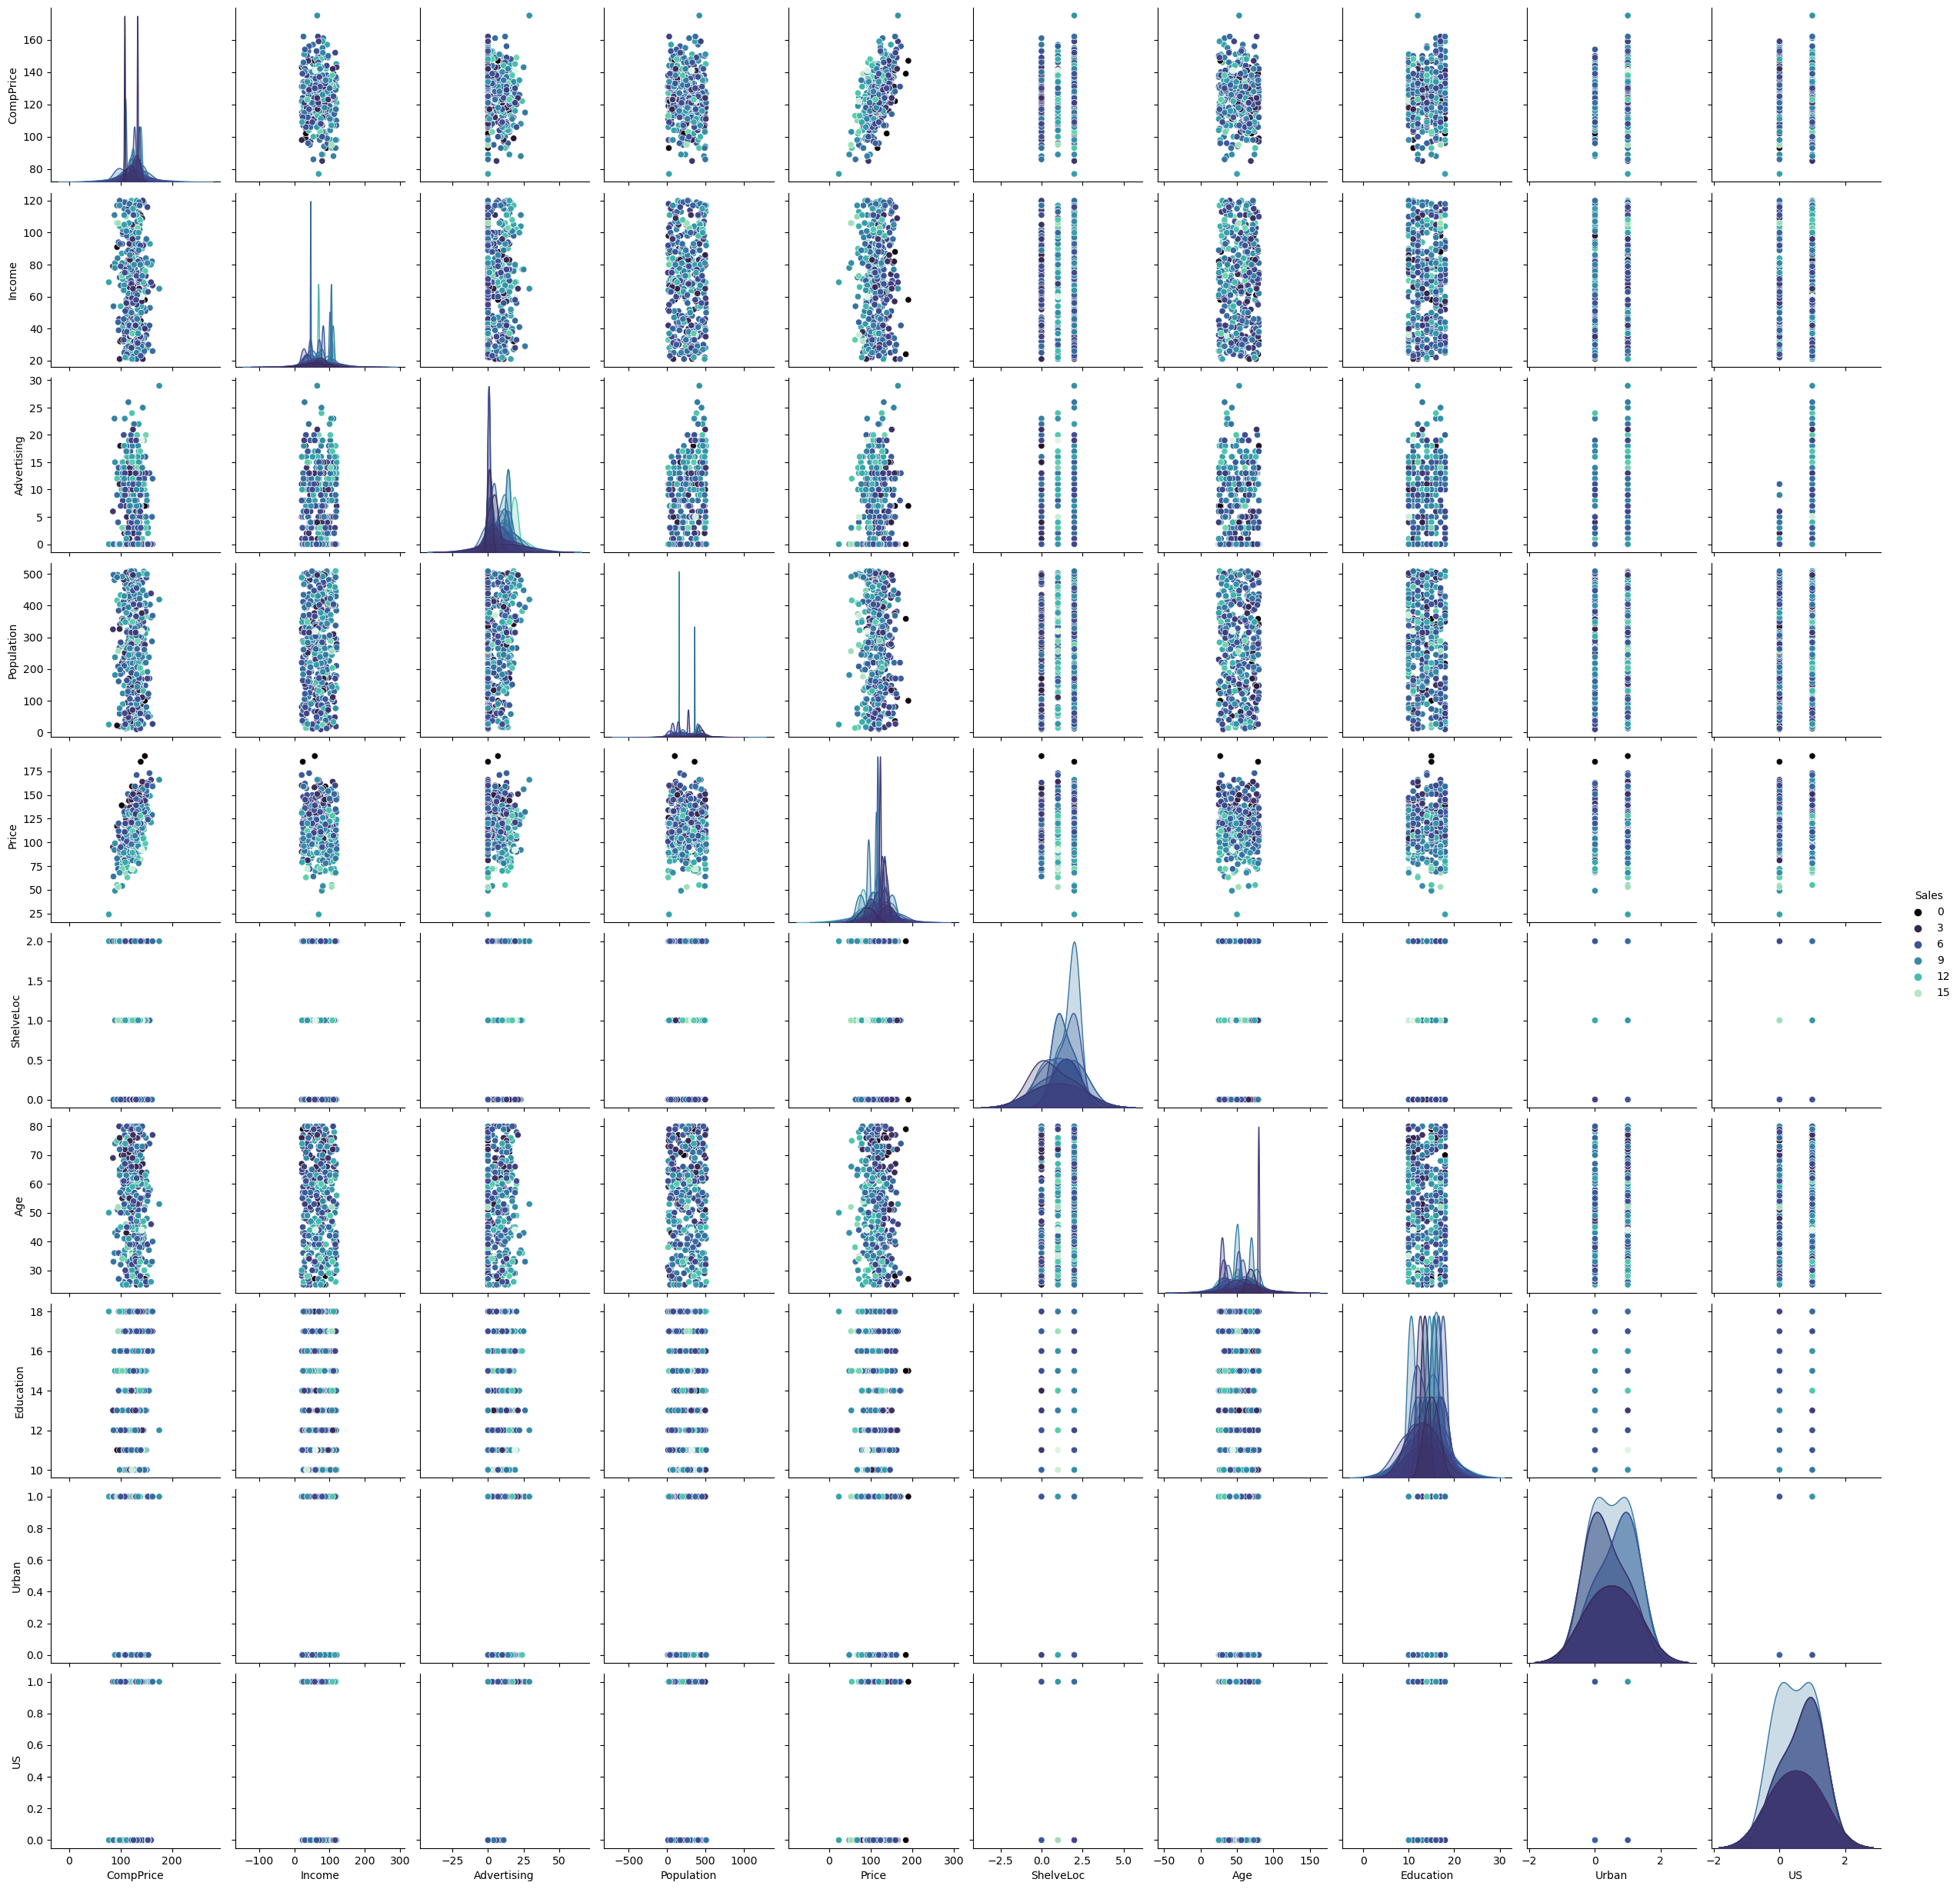

In [17]:
sns.pairplot(data,palette='mako', hue='Sales')
plt.show()

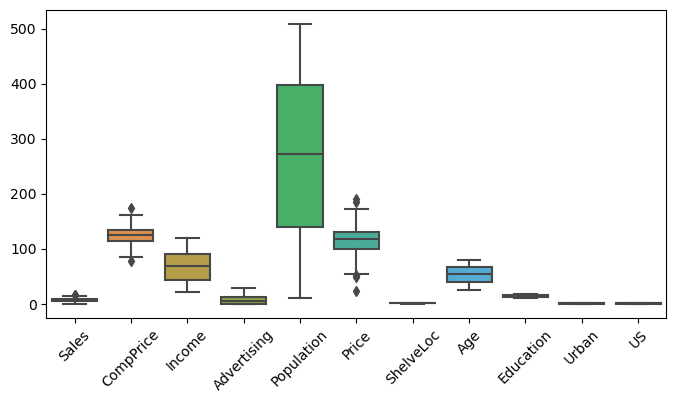

In [18]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data)
plt.xticks(rotation=45)
plt.show()

# split the data

In [19]:
X=data.iloc[:,0:10]
y=data.iloc[:,10]

In [20]:
X.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  
0         17      1  
1         10      1  
2         12      1  
3         14      1  
4         13      1

In [21]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: US, dtype: int32

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 10), (80, 10), (320,), (80,))

# Build the model

### Classification model

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model=DecisionTreeClassifier(max_depth=8,min_samples_leaf=10,random_state=42)

In [25]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, random_state=42)

# Predict for data

In [26]:
train_pred=model.predict(X_train)
train_pred

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [27]:
test_pred=model.predict(X_test)
test_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

### Training metrics

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
cm=confusion_matrix(y_train,train_pred)
cm

array([[111,   6],
       [ 18, 185]], dtype=int64)

<Axes: >

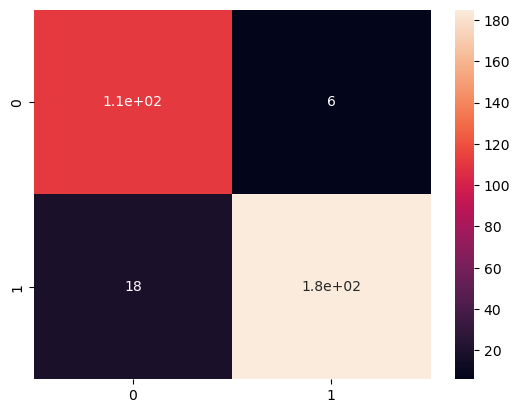

In [30]:
sns.heatmap(cm,annot=True)

In [31]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       117
           1       0.97      0.91      0.94       203

    accuracy                           0.93       320
   macro avg       0.91      0.93      0.92       320
weighted avg       0.93      0.93      0.93       320



In [32]:
from sklearn.metrics import roc_curve,roc_auc_score

In [33]:
train_proba=model.predict_proba(X_train)

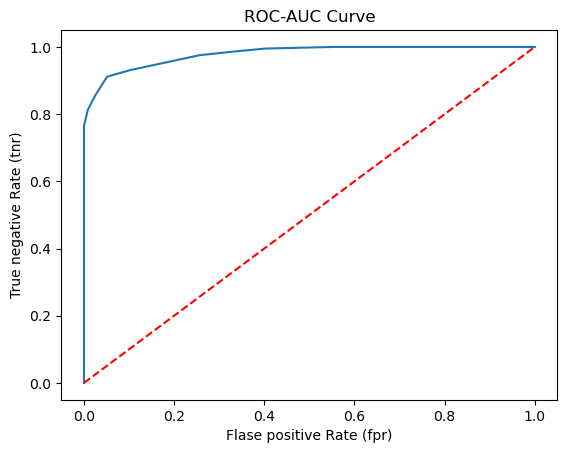

In [34]:
fpr,tpr,thresh=roc_curve(y_train,train_proba[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC-AUC Curve')
plt.xlabel('Flase positive Rate (fpr)')
plt.ylabel('True negative Rate (tnr)')
plt.show()

# Testing metrics

In [35]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[22,  3],
       [ 5, 50]], dtype=int64)

<Axes: >

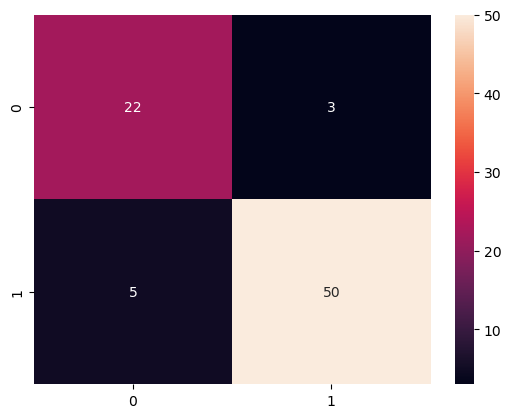

In [36]:
sns.heatmap(cm,annot=True)

In [37]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.94      0.91      0.93        55

    accuracy                           0.90        80
   macro avg       0.88      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



In [38]:
test_proba=model.predict_proba(X_test)

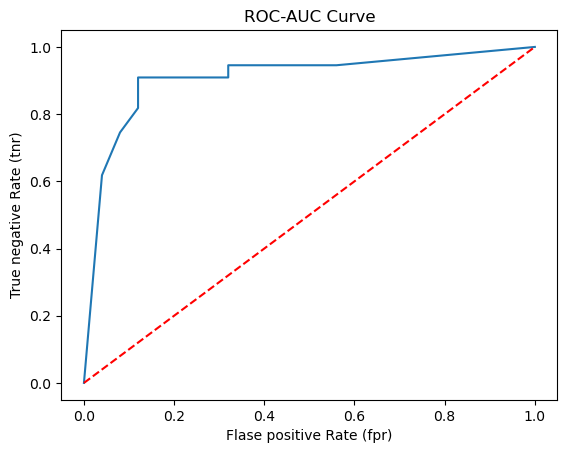

In [39]:
fpr,tpr,thresh=roc_curve(y_test,test_proba[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC-AUC Curve')
plt.xlabel('Flase positive Rate (fpr)')
plt.ylabel('True negative Rate (tnr)')
plt.show()

# plot the tree

In [40]:
from sklearn.tree import plot_tree

In [41]:
fnames=data.columns

In [42]:
fnames

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [43]:
class_names = ["Class1", "Class2", "Class3"]

In [44]:
cnames=data['Sales'].unique()

In [45]:
cnames[7]

11.85

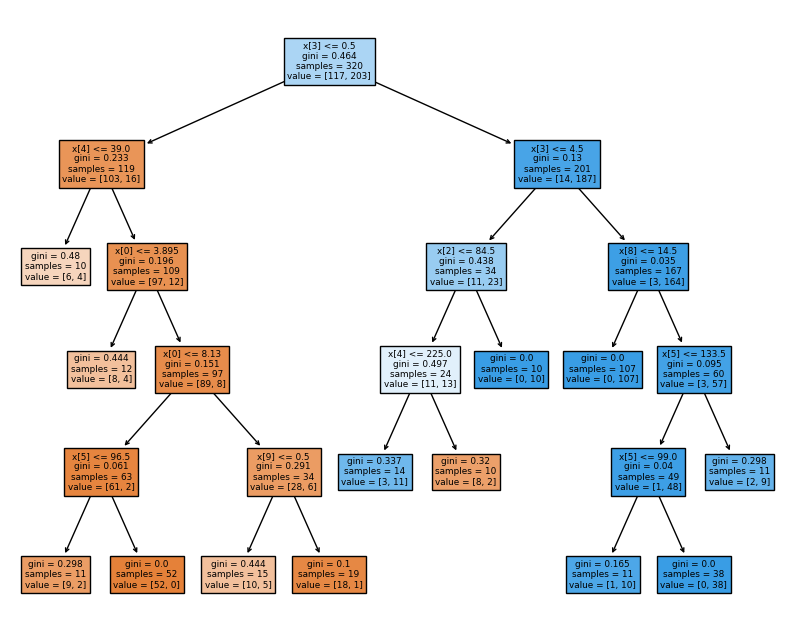

In [46]:
plt.figure(figsize=(10,8))
plot_tree(model, filled=True)
plt.show()

# Regressor model

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
pmodel=DecisionTreeRegressor(max_depth=8,criterion='squared_error')

In [49]:
pmodel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [50]:
train_pred=pmodel.predict(X_train)
train_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1.

In [51]:
test_pred=pmodel.predict(X_test)
test_pred

array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.])

### Predict and get metrics for the training data

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
train_mse=mean_squared_error(y_train,train_pred)
test_mse=mean_squared_error(y_test,test_pred)

In [54]:
train_mse,test_mse

(0.0, 0.2125)

In [55]:
train_rmse=np.sqrt(train_mse)
test_rmse=np.sqrt(test_mse)

In [56]:
train_rmse,test_rmse

(0.0, 0.4609772228646444)

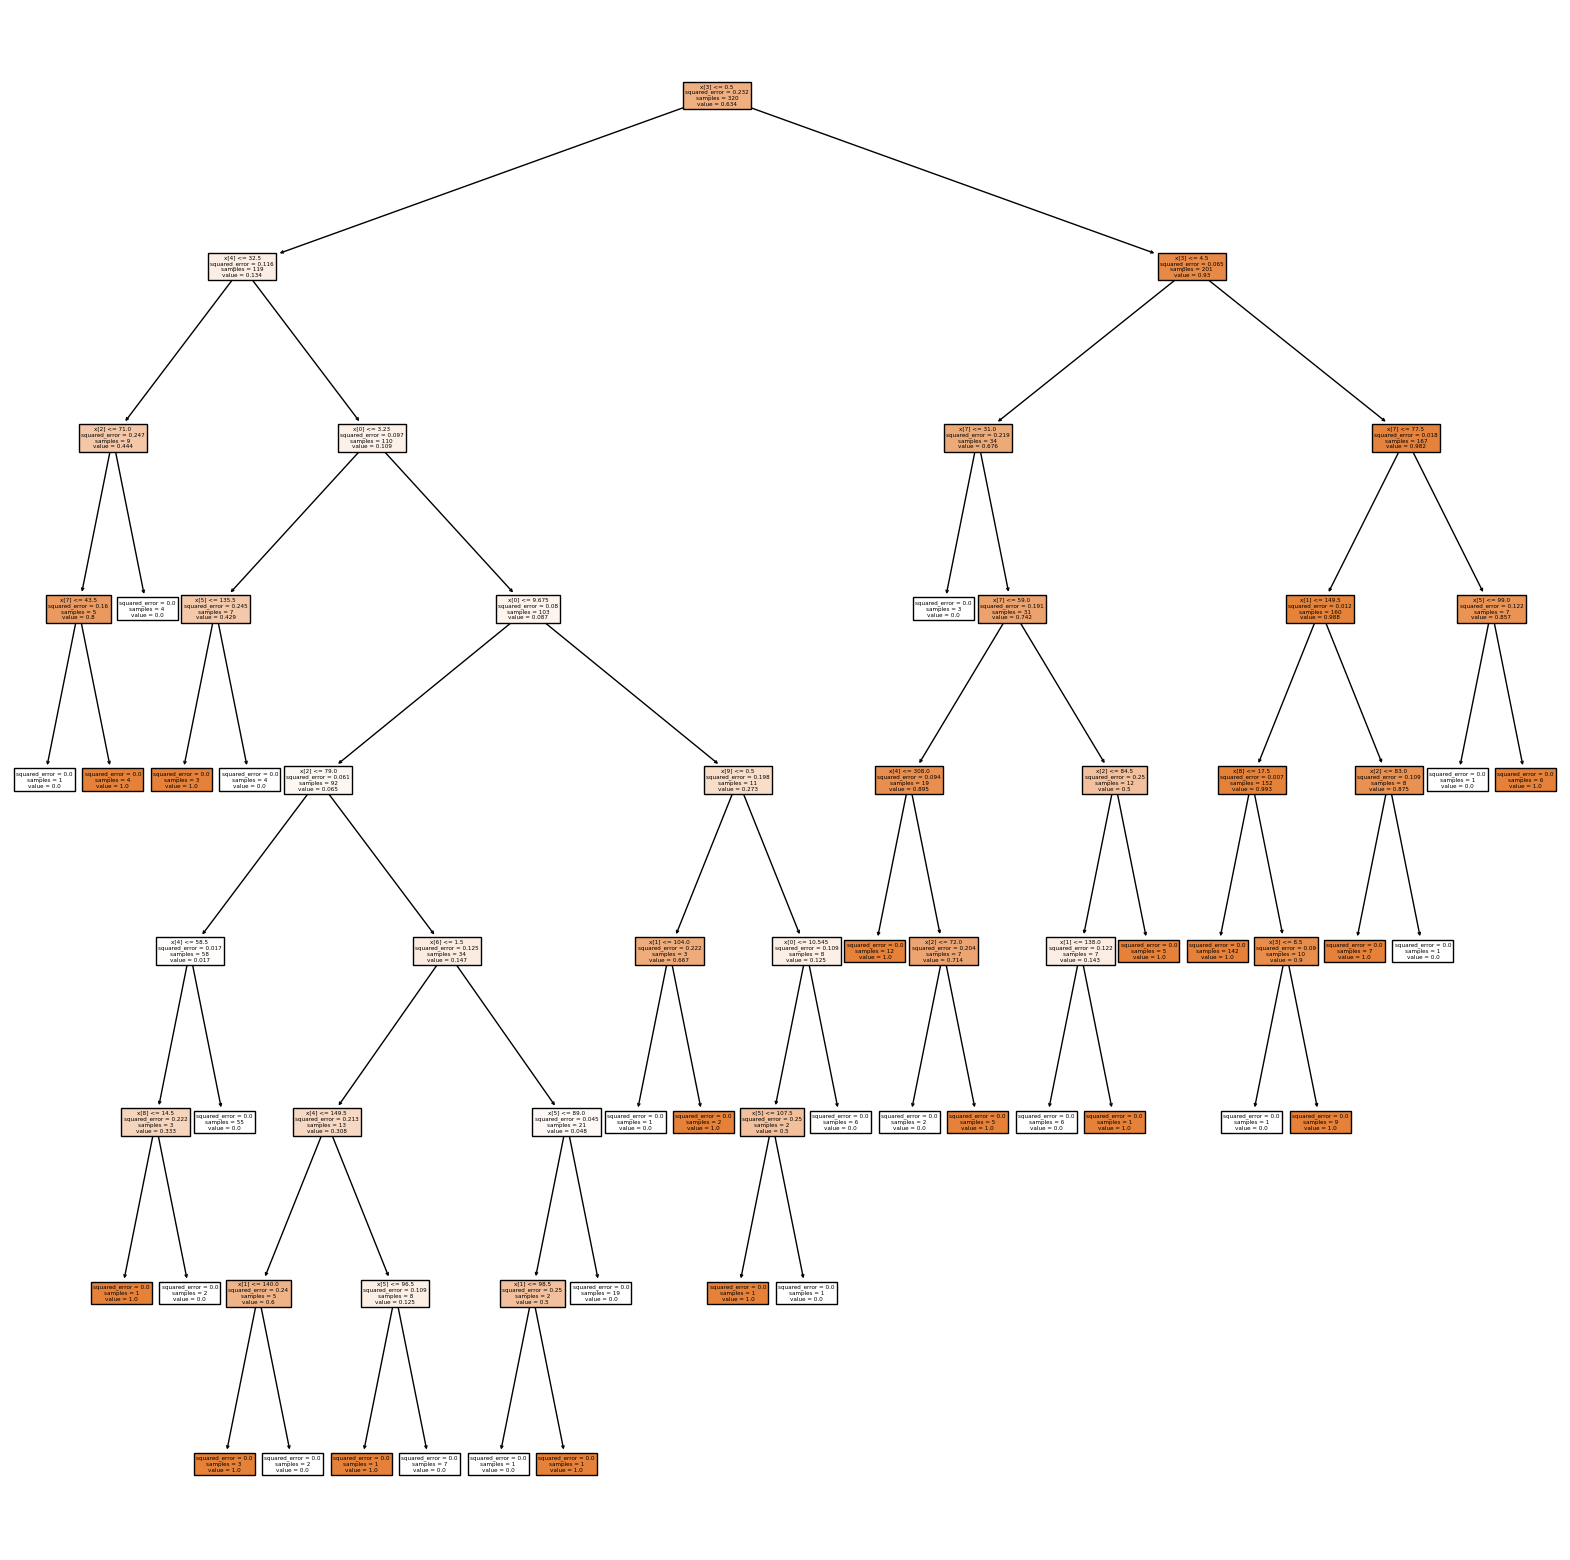

In [57]:
plt.figure(figsize=(20,20))
plot_tree(pmodel,filled=True)
plt.show()

math function

In [58]:
import math

In [59]:
train_rmse=math.sqrt(train_mse)

In [60]:
test_rmse=math.sqrt(test_mse)

In [61]:
train_rmse,test_rmse

(0.0, 0.4609772228646444)

# TSNE plot

In [62]:
from sklearn.manifold import TSNE

In [63]:
model=TSNE(n_components=2)

In [64]:
tsne_comps=model.fit_transform(X)

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


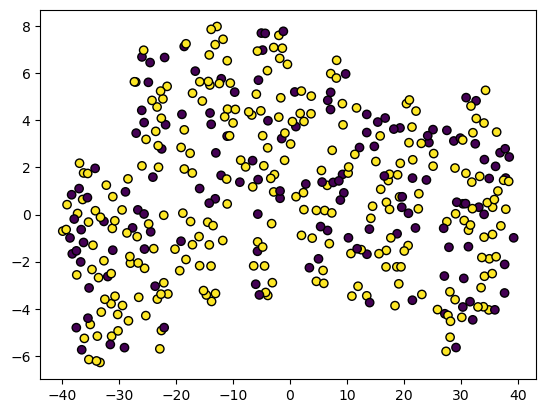

In [65]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y,cmap='viridis',edgecolor='k')
plt.show()

# .........................................................................................................................

.

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

### reat the data

In [66]:
data1=pd.read_csv('Fraud_check (1).csv')

In [67]:
data1.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

# change the object to numeric

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le=LabelEncoder()

In [70]:
data1['Undergrad']=le.fit_transform(data1['Undergrad'])
data1['Marital.Status']=le.fit_transform(data1['Marital.Status'])
data1['Urban']=le.fit_transform(data1['Urban'])

In [71]:
data1.head()

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0          0               2           68833            50047   
1          1               0           33700           134075   
2          0               1           36925           160205   
3          1               2           50190           193264   
4          0               1           81002            27533   

   Work.Experience  Urban  
0               10      1  
1               18      1  
2               30      1  
3               15      1  
4               28      0

In [72]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [73]:
data1.shape

(600, 6)

In [74]:
data1.duplicated().sum()

0

In [75]:
data1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<Axes: >

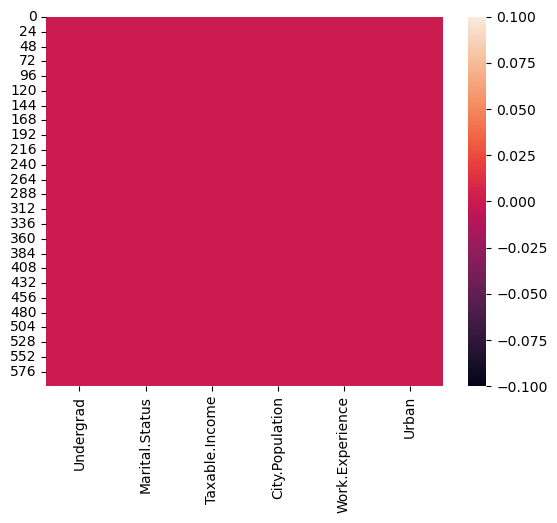

In [76]:
sns.heatmap(data1.isnull()
           )

In [77]:
data1.corr()

Undergrad  Marital.Status  Taxable.Income  City.Population  \
Undergrad         1.000000        0.042407       -0.049232         0.079579   
Marital.Status    0.042407        1.000000       -0.012944        -0.001564   
Taxable.Income   -0.049232       -0.012944        1.000000        -0.064387   
City.Population   0.079579       -0.001564       -0.064387         1.000000   
Work.Experience  -0.005362       -0.002213       -0.001818         0.013135   
Urban            -0.000267        0.064562        0.070628        -0.040098   

                 Work.Experience     Urban  
Undergrad              -0.005362 -0.000267  
Marital.Status         -0.002213  0.064562  
Taxable.Income         -0.001818  0.070628  
City.Population         0.013135 -0.040098  
Work.Experience         1.000000 -0.094559  
Urban                  -0.094559  1.000000

<Axes: >

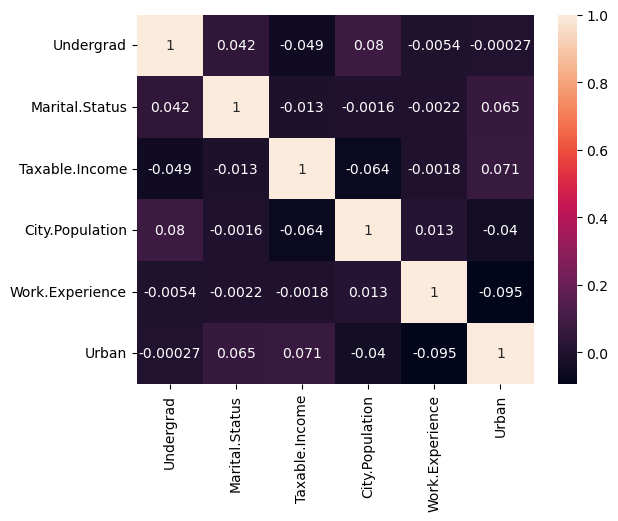

In [78]:
sns.heatmap(data1.corr(),annot=True)

# visualise the data

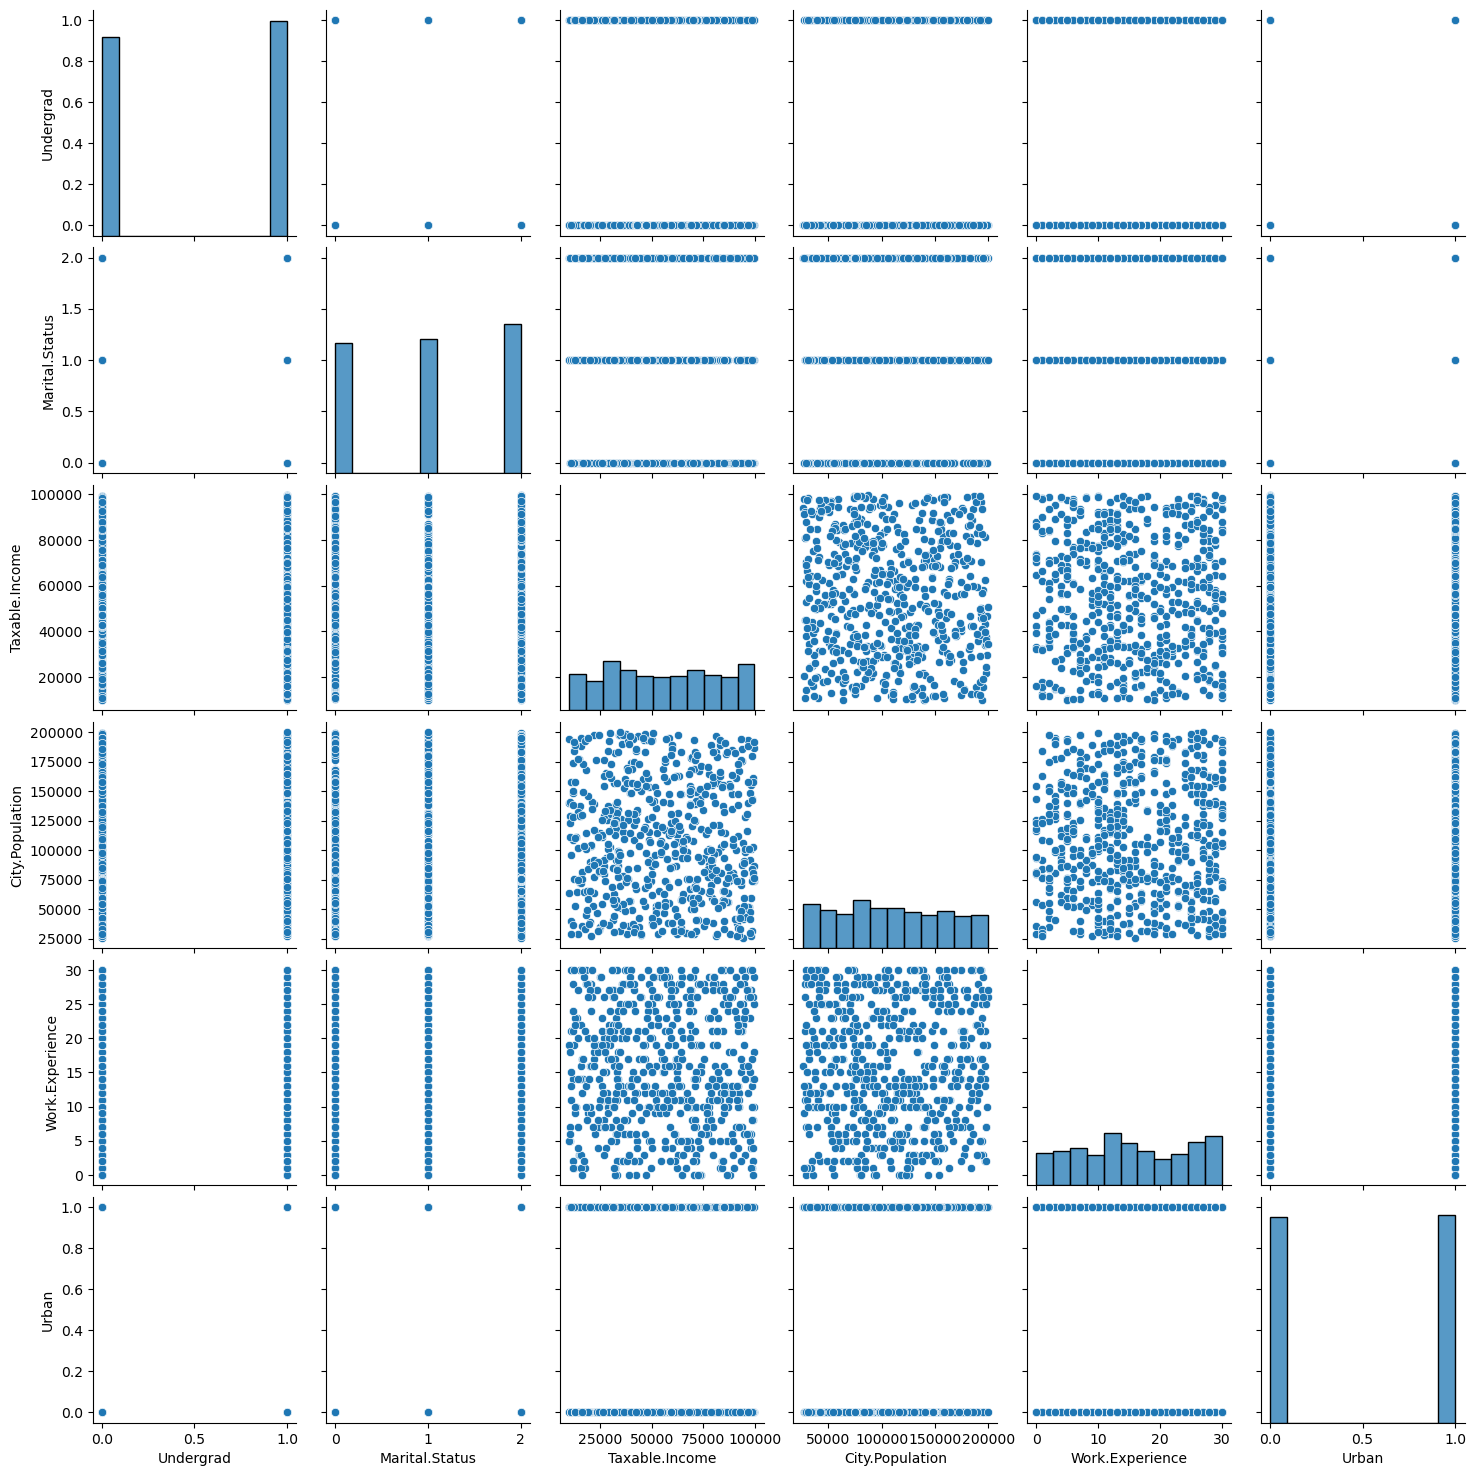

In [79]:
sns.pairplot(data1)
plt.show()

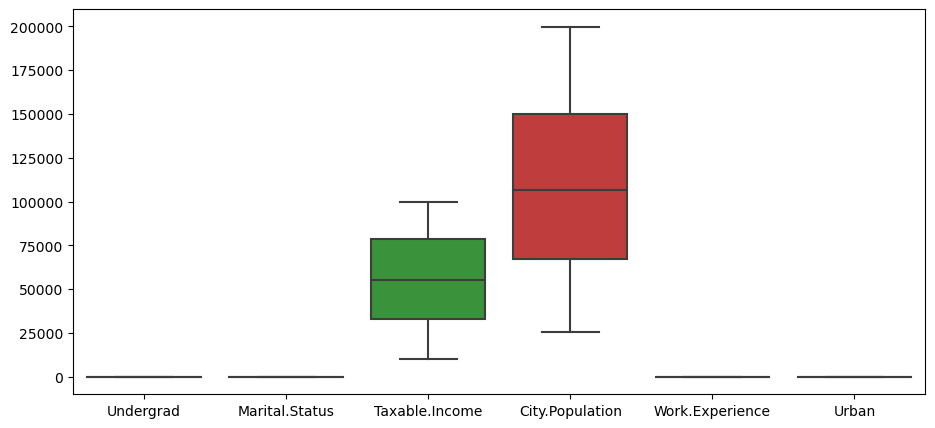

In [80]:
plt.figure(figsize=(11,5))
sns.boxplot(data1)
plt.show()

In [81]:
status=[]
for income in data1['Taxable.Income']:
    if income <= 30000:
        status.append('Risky')
    else :
        status.append('Good')

In [82]:
status

['Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Go

### Split data into training and testing

In [83]:
x=data1.iloc[:,:5]
y=data1.iloc[:,5]

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((480, 5), (120, 5), (480,), (120,))

# bulid the model

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
model1=DecisionTreeClassifier(max_depth=10,min_samples_leaf=10,random_state=42)

In [88]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42)

### Predict for training and testing data

In [89]:
train_pred1=model1.predict(x_train)
train_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1.

In [90]:
test_pred1=model1.predict(x_test)
test_pred1

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

### Training and testing metrics

In [91]:
from sklearn.metrics import confusion_matrix,classification_report

In [92]:
confusion_matrix(y_train,train_pred1)


array([[155,  87],
       [ 54, 184]], dtype=int64)

In [93]:
print(y_train.shape)
print(train_pred.shape)

(480,)
(320,)


In [94]:
print(classification_report(y_train,train_pred1))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       242
           1       0.68      0.77      0.72       238

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.71      0.71      0.71       480



In [95]:
confusion_matrix(y_test,test_pred1)

array([[23, 33],
       [29, 35]], dtype=int64)

In [96]:
print(classification_report(y_test,test_pred1))

              precision    recall  f1-score   support

           0       0.44      0.41      0.43        56
           1       0.51      0.55      0.53        64

    accuracy                           0.48       120
   macro avg       0.48      0.48      0.48       120
weighted avg       0.48      0.48      0.48       120



.

.

# Perform the Up-sampling for the above imbalanced data

In [97]:
from sklearn.datasets import make_classification
from sklearn.utils import resample

In [98]:
x, y = make_classification(n_samples=600, n_features=6, weights=[0.8, 0.2], random_state=42)

In [99]:
data1= pd.DataFrame(data1,columns=data1.columns)
data1['y'] = y
data1

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               2           68833            50047   
1            1               0           33700           134075   
2            0               1           36925           160205   
3            1               2           50190           193264   
4            0               1           81002            27533   
..         ...             ...             ...              ...   
595          1               0           76340            39492   
596          1               0           69967            55369   
597          0               0           47334           154058   
598          1               1           98592           180083   
599          0               0           96519           158137   

     Work.Experience  Urban  y  
0                 10      1  0  
1                 18      1  0  
2                 30      1  0  
3                 15      1  0  
4                 28      0  0  
..               ...    ... ..  
595                7      1  0  
596                2      1  0  
597                0      1  1  
598               17      0  0  
599               16      0  0  

[600 rows x 7 columns]

In [100]:
majority_class = data1[data1['y'] == 0]
minority_class = data1[data1['y'] == 1]

In [101]:
upsampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

In [102]:
df_upsampled = pd.concat([majority_class, upsampled_minority])
df_upsampled.head()

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0          0               2           68833            50047   
1          1               0           33700           134075   
2          0               1           36925           160205   
3          1               2           50190           193264   
4          0               1           81002            27533   

   Work.Experience  Urban  y  
0               10      1  0  
1               18      1  0  
2               30      1  0  
3               15      1  0  
4               28      0  0

In [103]:
X = df_upsampled.iloc[:,:6]
y = df_upsampled.iloc[:,6] 

In [104]:
X.head()

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0          0               2           68833            50047   
1          1               0           33700           134075   
2          0               1           36925           160205   
3          1               2           50190           193264   
4          0               1           81002            27533   

   Work.Experience  Urban  
0               10      1  
1               18      1  
2               30      1  
3               15      1  
4               28      0

In [105]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [106]:
 from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((766, 6), (192, 6), (766,), (192,))

# build the data

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
model2=DecisionTreeClassifier(max_depth=8,min_samples_leaf=10,random_state=42)

In [109]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, random_state=42)

In [110]:
train_pred1=model2.predict(X_train)
train_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1.

In [111]:
test_pred1=model2.predict(X_test)
test_pred

array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.])

.

In [112]:
from sklearn.metrics import confusion_matrix,classification_report

### train data

In [113]:
c=confusion_matrix(y_train,train_pred1)
c

array([[353,  40],
       [ 93, 280]], dtype=int64)

<Axes: >

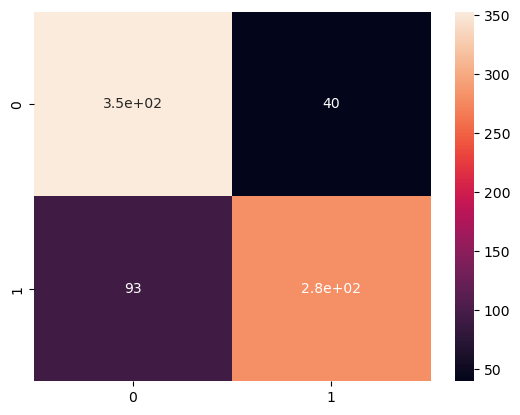

In [114]:
sns.heatmap(c,annot=True)

In [115]:
print(classification_report(y_train,train_pred1))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       393
           1       0.88      0.75      0.81       373

    accuracy                           0.83       766
   macro avg       0.83      0.82      0.82       766
weighted avg       0.83      0.83      0.83       766



### testing data

In [116]:
cm=confusion_matrix(y_test,test_pred1)

In [117]:
cm

array([[70, 16],
       [45, 61]], dtype=int64)

<Axes: >

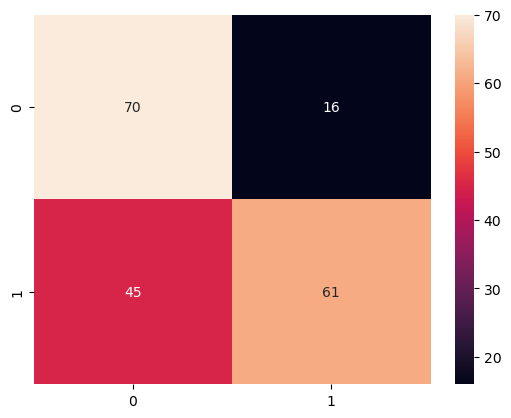

In [118]:
sns.heatmap(cm,annot=True)

In [119]:
print(classification_report(y_test,test_pred1))

              precision    recall  f1-score   support

           0       0.61      0.81      0.70        86
           1       0.79      0.58      0.67       106

    accuracy                           0.68       192
   macro avg       0.70      0.69      0.68       192
weighted avg       0.71      0.68      0.68       192



# decision tree

In [120]:
from sklearn.tree import plot_tree

In [121]:
fnames=data1.columns

In [122]:
fnames

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'y'],
      dtype='object')

In [123]:
cnames=data1['Taxable.Income'].unique()

In [124]:
cnames

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

# plot the tree

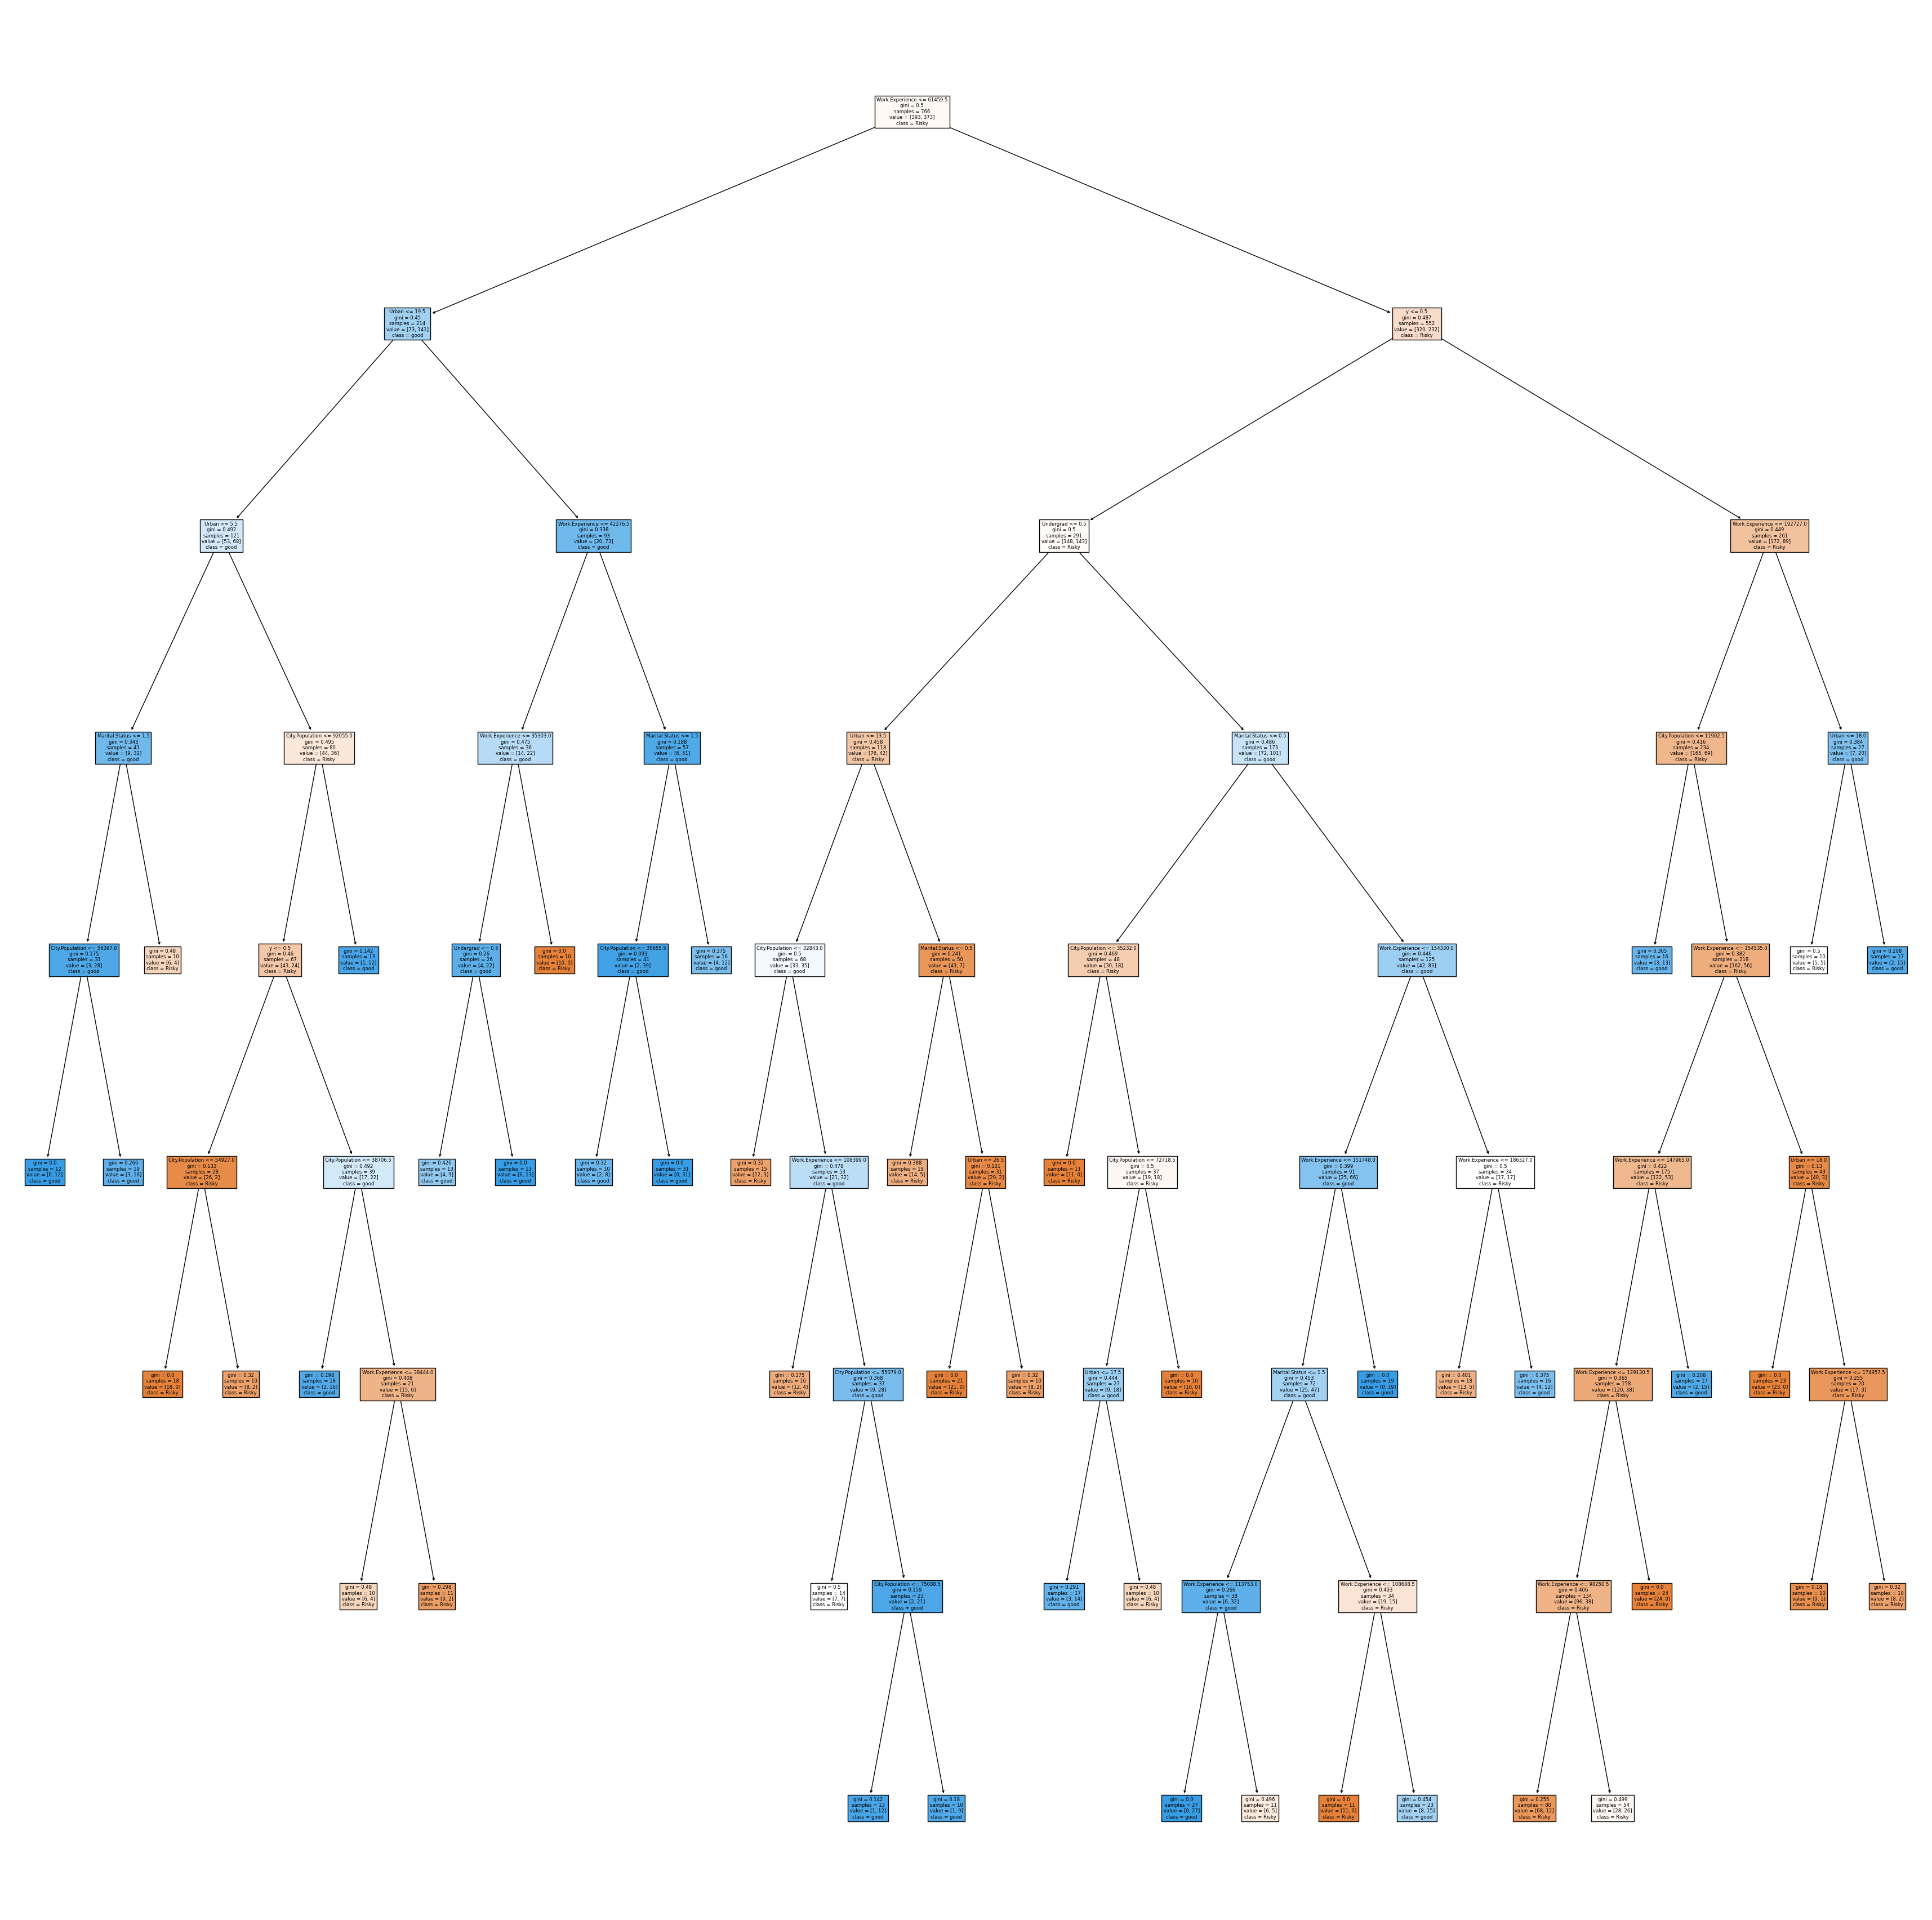

In [125]:
plt.figure(figsize=(44,44))
class_names=['Risky','good']
feature_names=fnames.drop('Taxable.Income').tolist()
plot_tree(model2,feature_names=feature_names,class_names=class_names,filled=True)
plt.show()

### Visualize the data

In [126]:
modelf1=TSNE(n_components=2)

In [127]:
tsne_comps=modelf1.fit_transform(X)

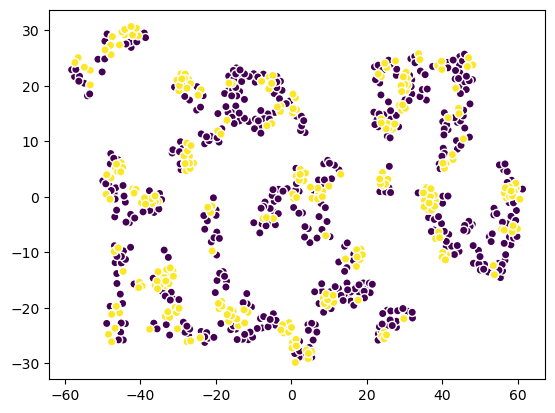

In [128]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y,cmap='viridis',edgecolor='white')
plt.show()